Saving Advertising.csv to Advertising (1).csv
Dataset shape: (200, 5)

Columns: ['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

Preview:
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

After cleaning shape: (200, 4)

Features used: ['TV', 'Radio', 'Newspaper']

========== MODEL PERFORMANCE ==========
MAE  : 1.46
RMSE : 1.78
R²   : 0.899

========== AD SPEND IMPACT ==========
TV           3.830606
Radio        2.801912
Newspaper    0.059983
dtype: float64


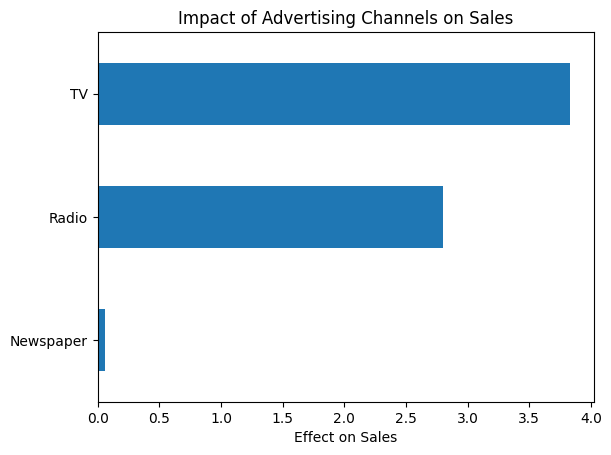

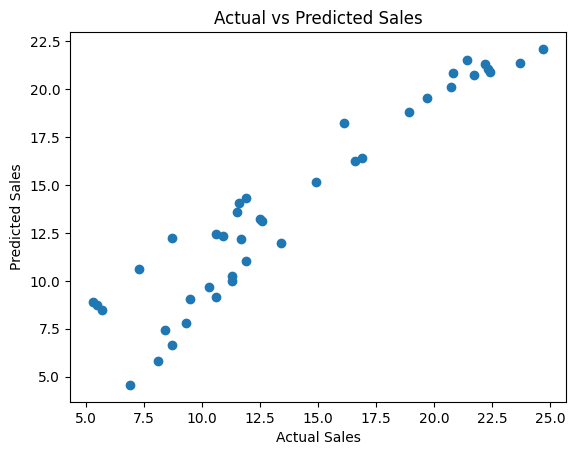


========== FUTURE PREDICTION ==========
Predicted Sales for TV=200, Radio=40, Newspaper=60 → 19.66

========== INSIGHTS ==========
• TV advertising has the strongest effect on sales
• Company should invest more budget in high-impact channels
• Model successfully predicts sales using regression
• Advertising spend clearly influences revenue growth


In [ ]:
# =========================================================
# TASK 4 — Sales Prediction using Python (FINAL COLAB SAFE)
# =========================================================

# ---------------------------
# 1️⃣ Upload dataset
# ---------------------------
from google.colab import files
uploaded = files.upload()

# ---------------------------
# 2️⃣ Imports
# ---------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ---------------------------
# 3️⃣ Load data
# ---------------------------
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nPreview:")
print(df.head())


# =========================================================
# 4️⃣ DATA CLEANING
# =========================================================

# Remove useless index column (fixes your error)
if "Unnamed: 0" in df.columns:
    df = df.drop("Unnamed: 0", axis=1)

# Remove nulls
df = df.dropna()

print("\nAfter cleaning shape:", df.shape)


# =========================================================
# 5️⃣ FEATURE SELECTION
# =========================================================

X = df.drop("Sales", axis=1)
y = df["Sales"]

print("\nFeatures used:", X.columns.tolist())


# =========================================================
# 6️⃣ TRANSFORMATION (Scaling)
# =========================================================

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# =========================================================
# 7️⃣ TRAIN TEST SPLIT
# =========================================================

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


# =========================================================
# 8️⃣ REGRESSION MODEL
# =========================================================

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


# =========================================================
# 9️⃣ MODEL EVALUATION
# =========================================================

print("\n========== MODEL PERFORMANCE ==========")
print("MAE  :", round(mean_absolute_error(y_test, y_pred), 2))
print("RMSE :", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))
print("R²   :", round(r2_score(y_test, y_pred), 3))


# =========================================================
# 🔟 IMPACT OF ADVERTISING (Feature Importance)
# =========================================================

importance = pd.Series(model.coef_, index=X.columns)

print("\n========== AD SPEND IMPACT ==========")
print(importance.sort_values(ascending=False))

importance.sort_values().plot(kind='barh')
plt.title("Impact of Advertising Channels on Sales")
plt.xlabel("Effect on Sales")
plt.show()


# =========================================================
# 1️⃣1️⃣ ACTUAL vs PREDICTED PLOT
# =========================================================

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


# =========================================================
# 1️⃣2️⃣ FUTURE SALES PREDICTION (ERROR-PROOF)
# =========================================================

# IMPORTANT:
# using X.columns ensures same features → avoids mismatch error

new_data = pd.DataFrame(
    [[200, 40, 60]],   # example: TV, Radio, Newspaper
    columns=X.columns
)

new_scaled = scaler.transform(new_data)
future_sales = model.predict(new_scaled)

print("\n========== FUTURE PREDICTION ==========")
print("Predicted Sales for TV=200, Radio=40, Newspaper=60 →",
      round(future_sales[0], 2))


# =========================================================
# 1️⃣3️⃣ BUSINESS INSIGHTS (auto print)
# =========================================================

best_channel = importance.idxmax()
print("\n========== INSIGHTS ==========")
print(f"• {best_channel} advertising has the strongest effect on sales")
print("• Company should invest more budget in high-impact channels")
print("• Model successfully predicts sales using regression")
print("• Advertising spend clearly influences revenue growth")
